In [1]:
include("../main.jl")
using PyCall;
using Revise;
using Gen;
using CairoMakie
using Serialization
sepsis_gym = pyimport("custom_sepsis");

In [3]:
history_size = 1000
pols = [sepsis_gym.random_policy() for _ in 1:history_size]
episodes = [sepsis_gym.run_episode(pols[i]) for i in 1:history_size]
histories = []
for type in [:SimplePPL, :Softmax]
    model = MCMCModel(type, choicemap(), [], []) 
    history = PPHistoryRun("test-$(label_dict[model.type])-$(history_size)", model)
    update_model_history!(history.model, episodes, [to_policy(p) for p in pols])
    run_history_mcmc!(history, history_size, 200, 1)
    push!(histories, history)
    save_history_jld(history)
    println("Finished episode ", history.model.type, " ", history_size)
end

Finished episode SimplePPL 1000
Finished episode Softmax 1000


In [6]:
histories[1].mean_rewards

Dict{Int64, Vector{Float64}} with 1 entry:
  1000 => [-0.11902]

In [3]:
function plot_scores(model)
    ks = sort(collect(keys(model.models)))
    fig = Figure()
    ax = Axis(fig[1, 1])

    # for k in ks
        lines!(ax, model.models[ks[end]].scores, label=string(ks[end]))
    # end

    axislegend(ax, position=(:right, :bottom))
    fig
    
end

plot_scores (generic function with 1 method)

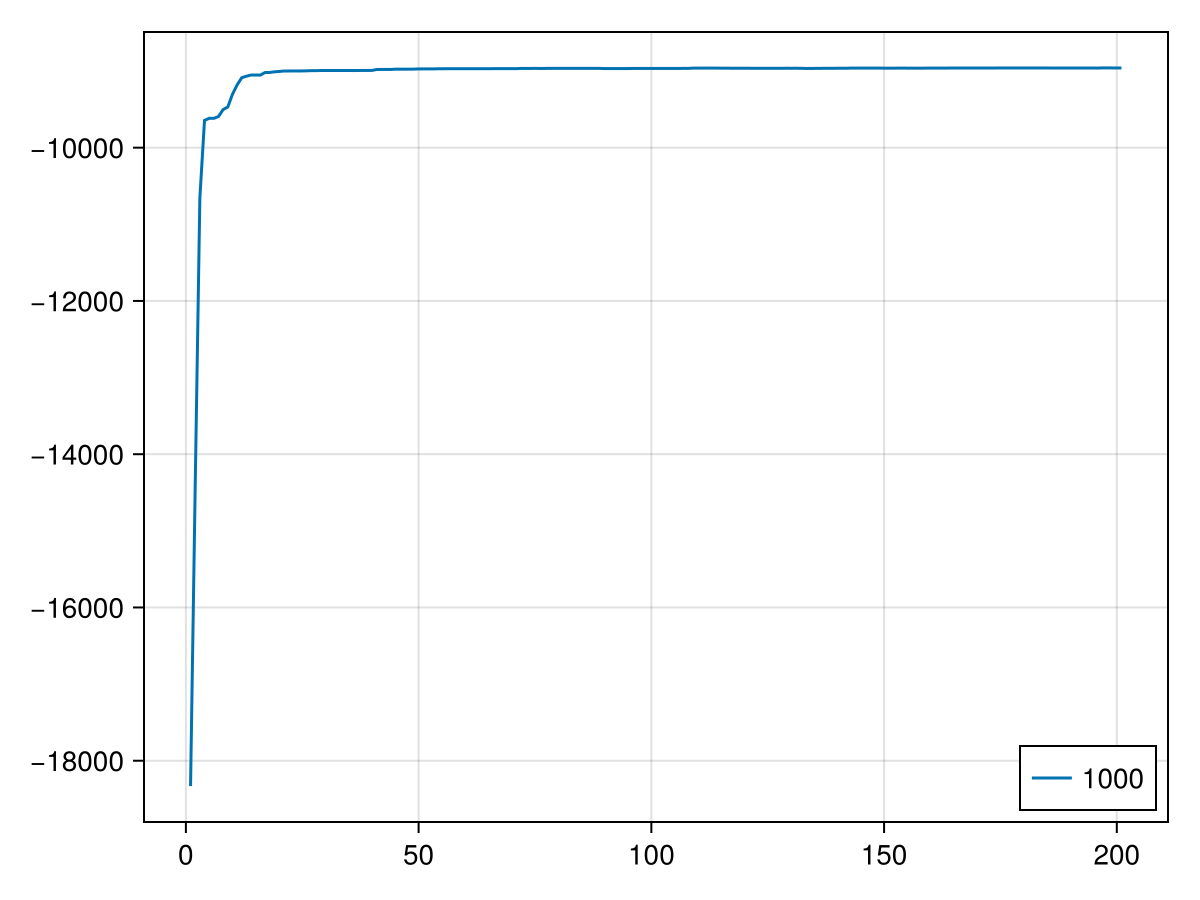

In [11]:
plot_scores(histories[1])


In [14]:
[model.acceptance for (k, model) in histories[1].models]


1-element Vector{Float64}:
 0.11966666666666642

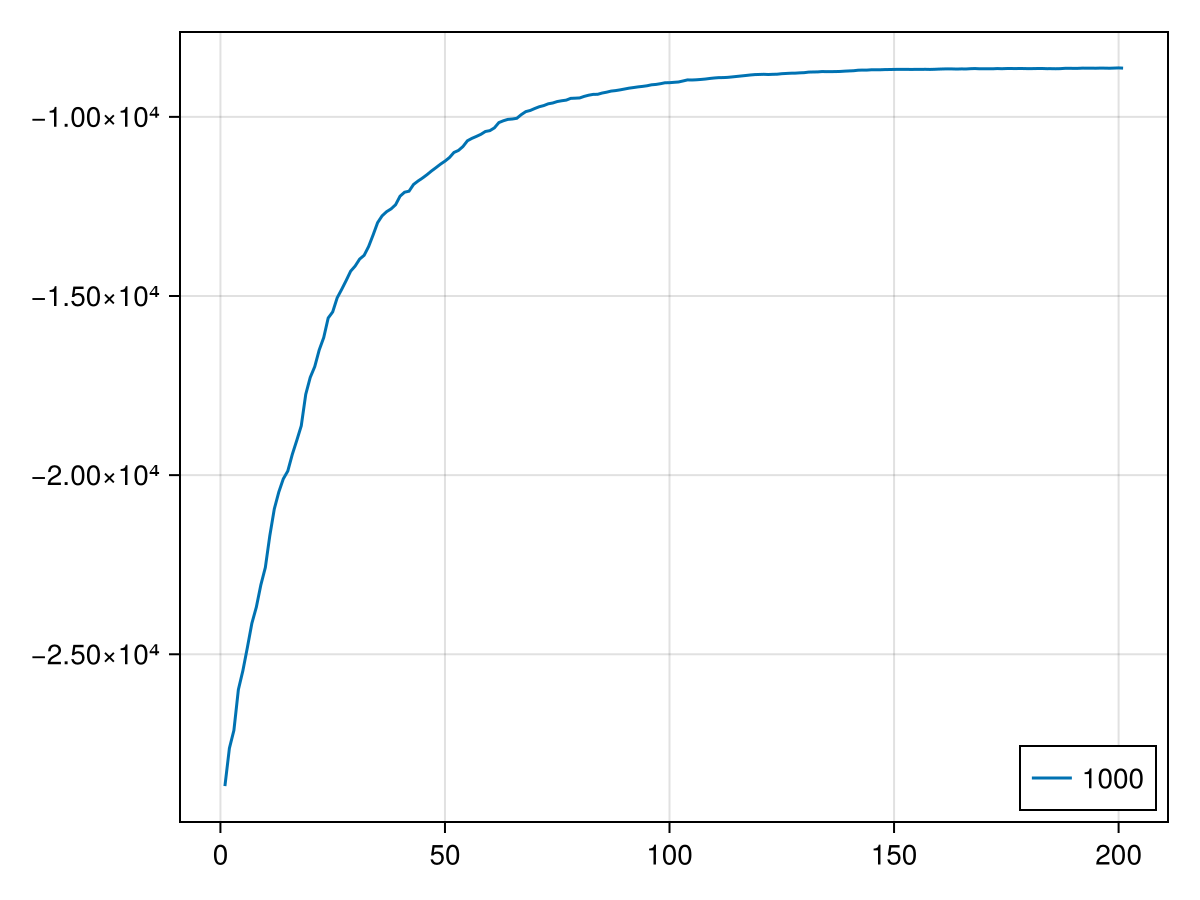

In [9]:
plot_scores(histories[2])

In [ ]:
history_size = 1000
pols = [sepsis_gym.random_policy() for _ in 1:history_size]
episodes = [sepsis_gym.run_episode(pols[i]) for i in 1:history_size]
histories = []
type = :SimplePPL
model = MCMCModel(type, choicemap(), [], []) 
history = PPHistoryRun("test-$(label_dict[model.type])-$(history_size)", model)
update_model_history!(history.model, episodes, [to_policy(p) for p in pols])
run_history_mcmc!(history, history_size, 100, 1)
push!(histories, history)
save_history_jld(history)
println("Finished episode ", history.model.type, " ", history_size)


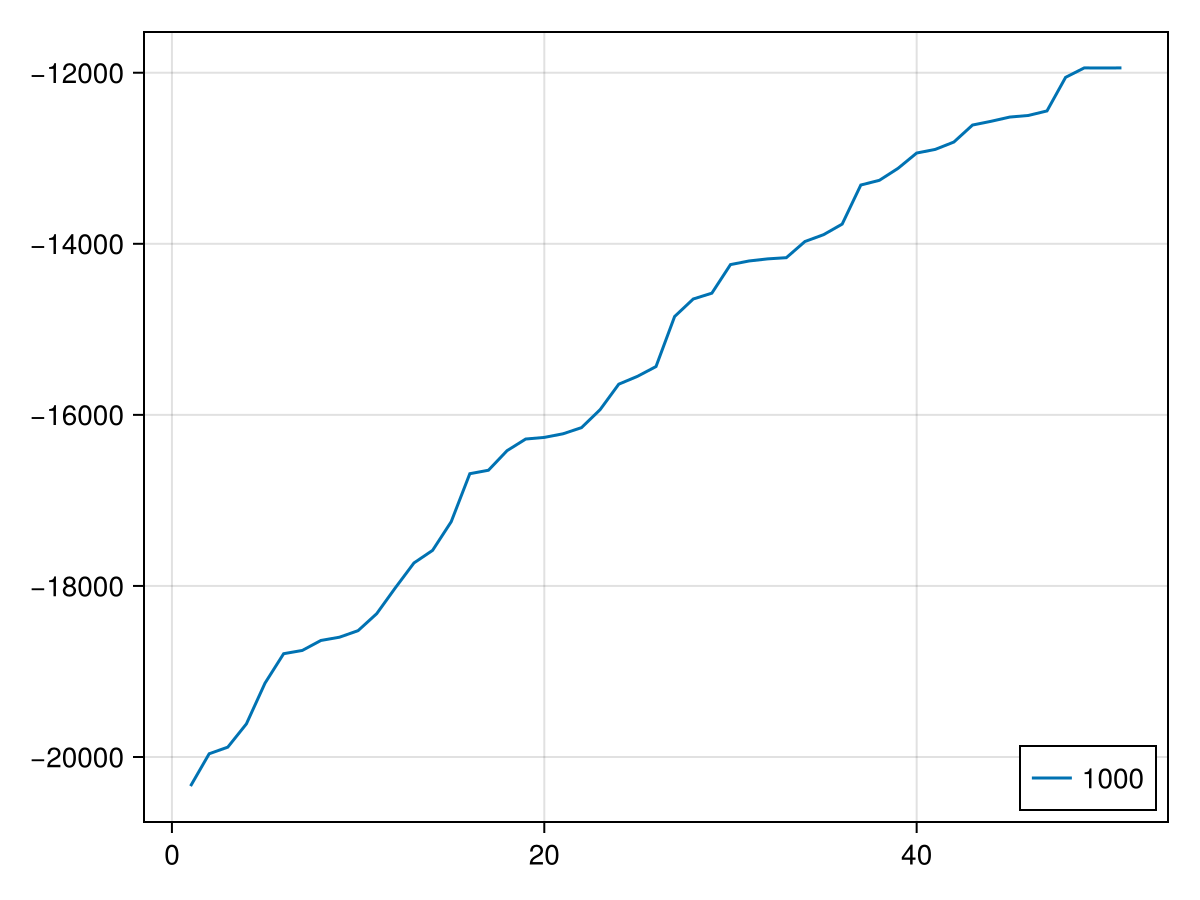

In [ ]:
plot_scores(history)


In [ ]:
history.models[1000].acceptance

0.5253333333333334